In [1]:
# -*- coding: utf-8 -*-
from __future__ import print_function

from keras.layers import Dense, Activation, SimpleRNN
from keras.models import Sequential
import numpy as np
import codecs

Using TensorFlow backend.


In [2]:
INPUT_FILE = "./data/11-0.txt"
with codecs.open(INPUT_FILE, "r", encoding="utf-8") as f:
    lines = [line.strip().lower() for line in f
             if len(line) != 0]
    text = " ".join(lines)

In [3]:
chars = set(text)#語彙数60?
nb_chars = len(chars)
char2index = dict((c, i) for i, c in enumerate(chars))
index2char = dict((i, c) for i, c in enumerate(chars))

In [4]:
print("Creating input and label text...")
SEQLEN = 10
STEP = 1

input_chars = []
label_chars = []
for i in range(0, len(text) - SEQLEN, STEP):
    input_chars.append(text[i:i + SEQLEN])
    label_chars.append(text[i + SEQLEN])

Creating input and label text...


In [5]:
print("Vectorizing input and label text...")
X = np.zeros((len(input_chars), SEQLEN, nb_chars), dtype=np.bool)
y = np.zeros((len(input_chars), nb_chars), dtype=np.bool)
for i, input_char in enumerate(input_chars):
    for j, ch in enumerate(input_char):
        X[i, j, char2index[ch]] = 1
    y[i, char2index[label_chars[i]]] = 1

Vectorizing input and label text...


In [6]:
HIDDEN_SIZE = 128
BATCH_SIZE = 128
NUM_ITERATIONS = 25
NUM_EPOCHS_PER_ITERATION = 1
NUM_PREDS_PER_EPOCH = 100

In [7]:
model = Sequential()
model.add(SimpleRNN(HIDDEN_SIZE, return_sequences=False,
                    input_shape=(SEQLEN, nb_chars),
                    unroll=True))
model.add(Dense(nb_chars))
model.add(Activation("softmax"))

model.compile(loss="categorical_crossentropy", optimizer="rmsprop")

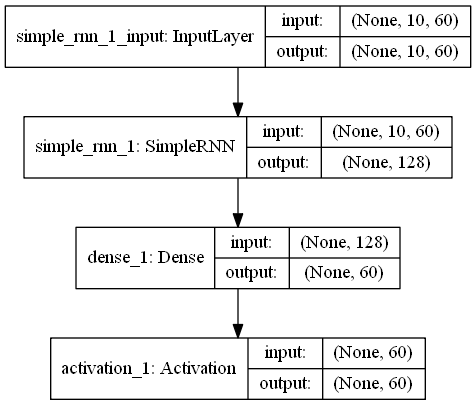

In [12]:
from keras.utils import plot_model
plot_model(model, to_file='./model.png', show_shapes='t')

In [8]:
for iteration in range(NUM_ITERATIONS):
    print("=" * 50)
    print("Iteration #: {}".format(iteration))
    model.fit(X, y, batch_size=BATCH_SIZE, epochs=NUM_EPOCHS_PER_ITERATION)

    # testing model
    # randomly choose a row from input_chars, then use it to
    # generate text from model for next 100 chars
    test_idx = np.random.randint(len(input_chars))
    test_chars = input_chars[test_idx]
    print("Generating from seed: {}".format(test_chars))
    print(test_chars, end="")
    for i in range(NUM_PREDS_PER_EPOCH):
        Xtest = np.zeros((1, SEQLEN, nb_chars))
        for j, ch in enumerate(test_chars):
            Xtest[0, j, char2index[ch]] = 1
        pred = model.predict(Xtest, verbose=0)[0]
        ypred = index2char[np.argmax(pred)]
        print(ypred, end="")
        # move forward with test_chars + ypred
        test_chars = test_chars[1:] + ypred
    print()

Iteration #: 0
Epoch 1/1
162739/162739 [==============================] - 5s 29us/step - loss: 2.3754
Generating from seed: s of her v
s of her ver and the sat in the said the sat in the said the sat in the said the sat in the said the sat in th
Iteration #: 1
Epoch 1/1
162739/162739 [==============================] - 4s 23us/step - loss: 2.0597
Generating from seed: ea--’ [‘i 
ea--’ [‘i the said the mare the said the mare the said the mare the said the mare the said the mare the said t
Iteration #: 2
Epoch 1/1
162739/162739 [==============================] - 4s 23us/step - loss: 1.9572
Generating from seed: ordered.  
ordered.  ‘ing and the waster what in was so the could the could the could the could the could the could the c
Iteration #: 3
Epoch 1/1
162739/162739 [==============================] - 4s 23us/step - loss: 1.8775
Generating from seed: recovered 
recovered and the dore the gote the with the with the with the with the with the with the with the with the wi
Iteration #: 4
E